# Feature-based analysis 

This is one of the key analysis to compare different experimental conditions and to guide future insights and reports. After analyzing the raw data and obtaining a summarized metric set, we can consider each measurement as a feature in a dataset and understand which of these statistical features and measurements is most informative and better differentiates the different experimental conditions (*feature importance* analysis) or we can use this dataset to train machine learning models to predict experimental conditions (*classification* analysis) or to obtain a suitable visualization of the data structure (*geometric* analysis).

These analysis start with loading a pre-computed DataFrame with all the metrics computed for all experimental conditions. This can be obtained with the tools provided in MEA-flow (see examples in [activity_analysis.ipynb](activity_analysis.ipynb)) or any external tools that pre-processed and analyzed the dataset. When considered like this, we have a dataset with `n_samples` (unique observations or measurements) and `n_features` (set of metrics).

The most critical aspect (from a machine learning standpoint) is that it is not advisable to have a single measurement per condition. We consider a measurement as a `sample` in our dataset so we need to have multiple measurements/samples per condition (either multiple recordings, multiple wells, or multiple time windows). Consider, for example, that we use the entire metric set available in MEA-flow, comprising 70+ features (comprising metrics of activity, regularity, synchrony, burstiness, etc.). If we only have one measurement per condition (e.g. mean firing rate for condition 1), this dataset suffers from the **curse of dimensionality** (`n_samples` << `n_features`) and is not informative enough to perform a proper analysis. Many of the ML algorithms will fail in these circumstances and those that don't will provide very unstable results. 

In [activity_analysis.ipynb](activity_analysis.ipynb), we demonstrate how we can augment our dataset to mitigate this effect by performing different groupings of the data:
1. Grouping only by condition → 1 sample per feature per condition ❌ 
2. Grouping by condition and well → 1 sample per feature per condition per well (4x samples per condition) ⚠️
3. Grouping by condition and time → 1 sample per feature per condition per time window (n_time_windows samples per condition) ✅
4. Grouping by condition and single electrode → 1 sample per feature per condition per electrode (n_electrodes samples per condition) ✅

---


In [1]:
import pandas as pd

# load DataFrame
results_global = pd.read_csv('results_global.csv', index_col=0)
results_wells = pd.read_csv('results_wells.csv', index_col=0)
results_temporal = pd.read_csv('results_temporal.csv', index_col=0)
results_channels = pd.read_csv('results_channels.csv', index_col=0)

## 1) Exploratory analysis - visualizing structure of the data

/home/neuro/repos/mea-flow/src/mea_flow/analysis/synchrony.py:19: UserWarning: PySpike not available. Some synchrony metrics will be disabled.
  warnings.warn("PySpike not available. Some synchrony metrics will be disabled.")


=== Feature Space Manifold Analysis ===
Data shape: (3, 71) (3 samples, 74 features)
Conditions: ['chronic-stress' 'control' 'miR-186-5p-inhibition']
Applying PCA...
Applying MDS...
Applying TSNE...


/home/neuro/repos/mea-flow/src/mea_flow/analysis/feature_space.py:86: UserWarning: Found NaN values. Filling with column means.
  warnings.warn("Found NaN values. Filling with column means.")
/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: [40 41 42]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(



=== Analysis Summary ===
Number of features: 74
Number of samples: 3
Conditions: ['chronic-stress' 'control' 'miR-186-5p-inhibition']

PCA:
  Total explained variance: 100.0%

MDS:
  Stress: 0.0002

TSNE:
  KL divergence: 0.0000


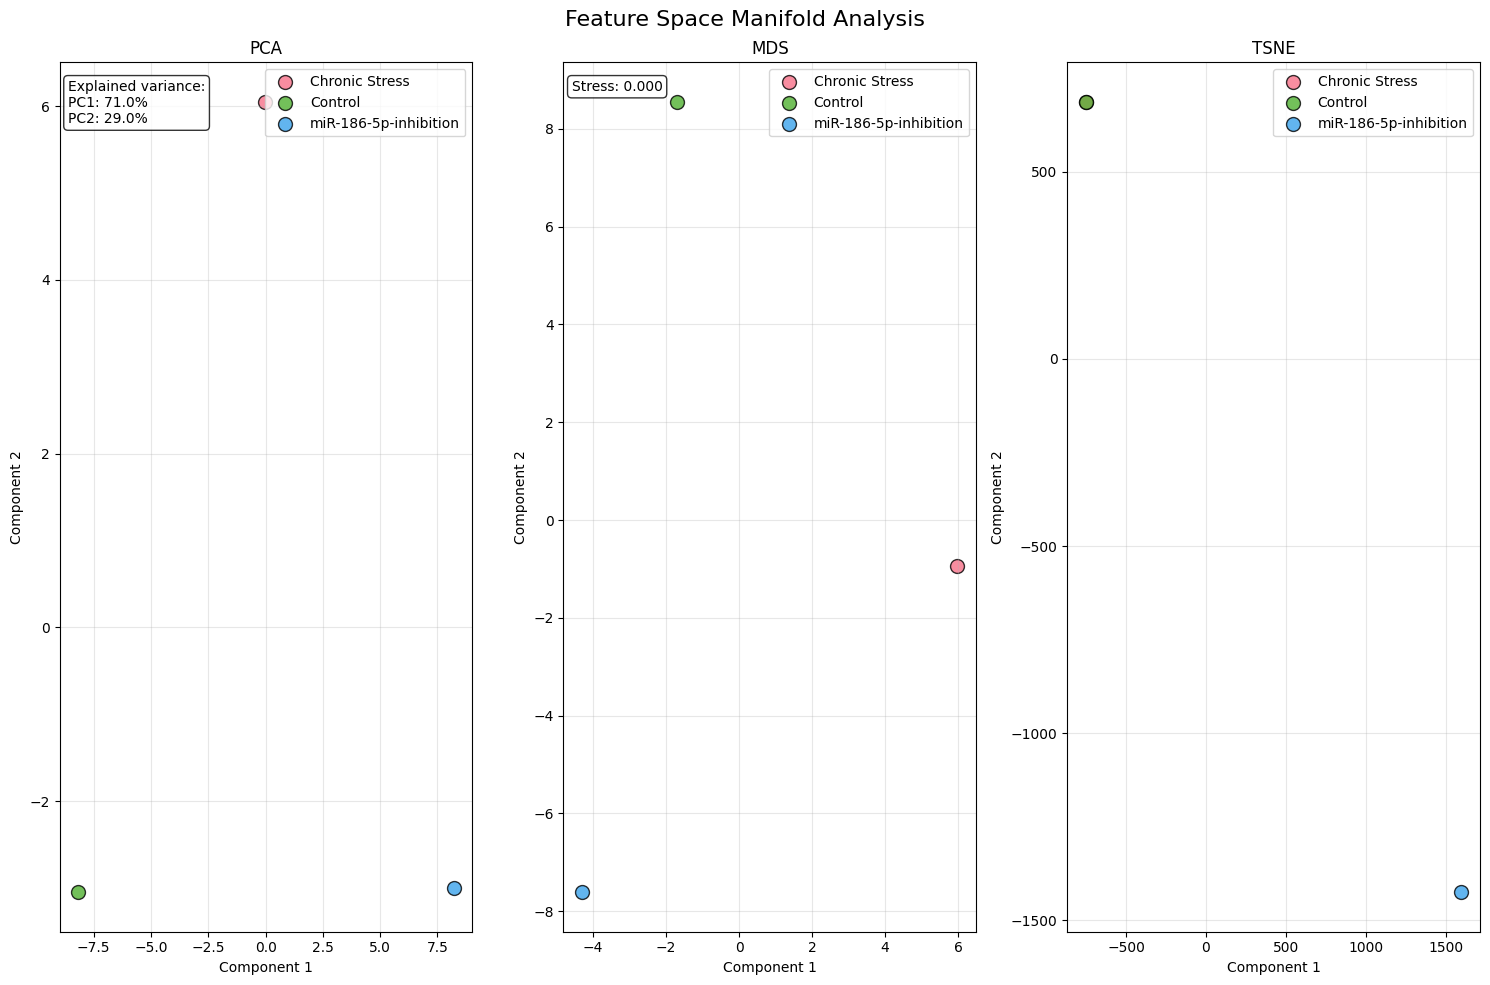

In [2]:
import matplotlib.pyplot as plt
from mea_flow.analysis import analyze_feature_space

# Simple one-line analysis
results = analyze_feature_space(
    csv_path='results_global.csv',
    condition_column='condition',  # Replace with your actual condition column
    exclude_columns=['group_type', 'group_id', 'n_channels', 'recording_length'],  # Non-measurement columns to exclude
    methods=['PCA', 'MDS', 'TSNE'], #, 'UMAP'],
    condition_names={'control': 'Control', 'chronic-stress': 'Chronic Stress', 'miR-186-5p-inhibition': 'miR-186-5p-inhibition'}  # Optional
)

=== Feature Space Manifold Analysis ===
Data shape: (180, 47) (180 samples, 50 features)
Conditions: ['chronic-stress' 'control' 'miR-186-5p-inhibition']
Applying PCA...
Applying MDS...


/home/neuro/repos/mea-flow/src/mea_flow/analysis/feature_space.py:86: UserWarning: Found NaN values. Filling with column means.
  warnings.warn("Found NaN values. Filling with column means.")
/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: [40 41 42]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Applying TSNE...
Applying SPECTRAL...
Applying UMAP...


/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



=== Analysis Summary ===
Number of features: 50
Number of samples: 180
Conditions: ['chronic-stress' 'control' 'miR-186-5p-inhibition']

PCA:
  Total explained variance: 66.1%

MDS:
  Stress: 48915.3111

TSNE:
  KL divergence: 0.2198

SPECTRAL:

UMAP:


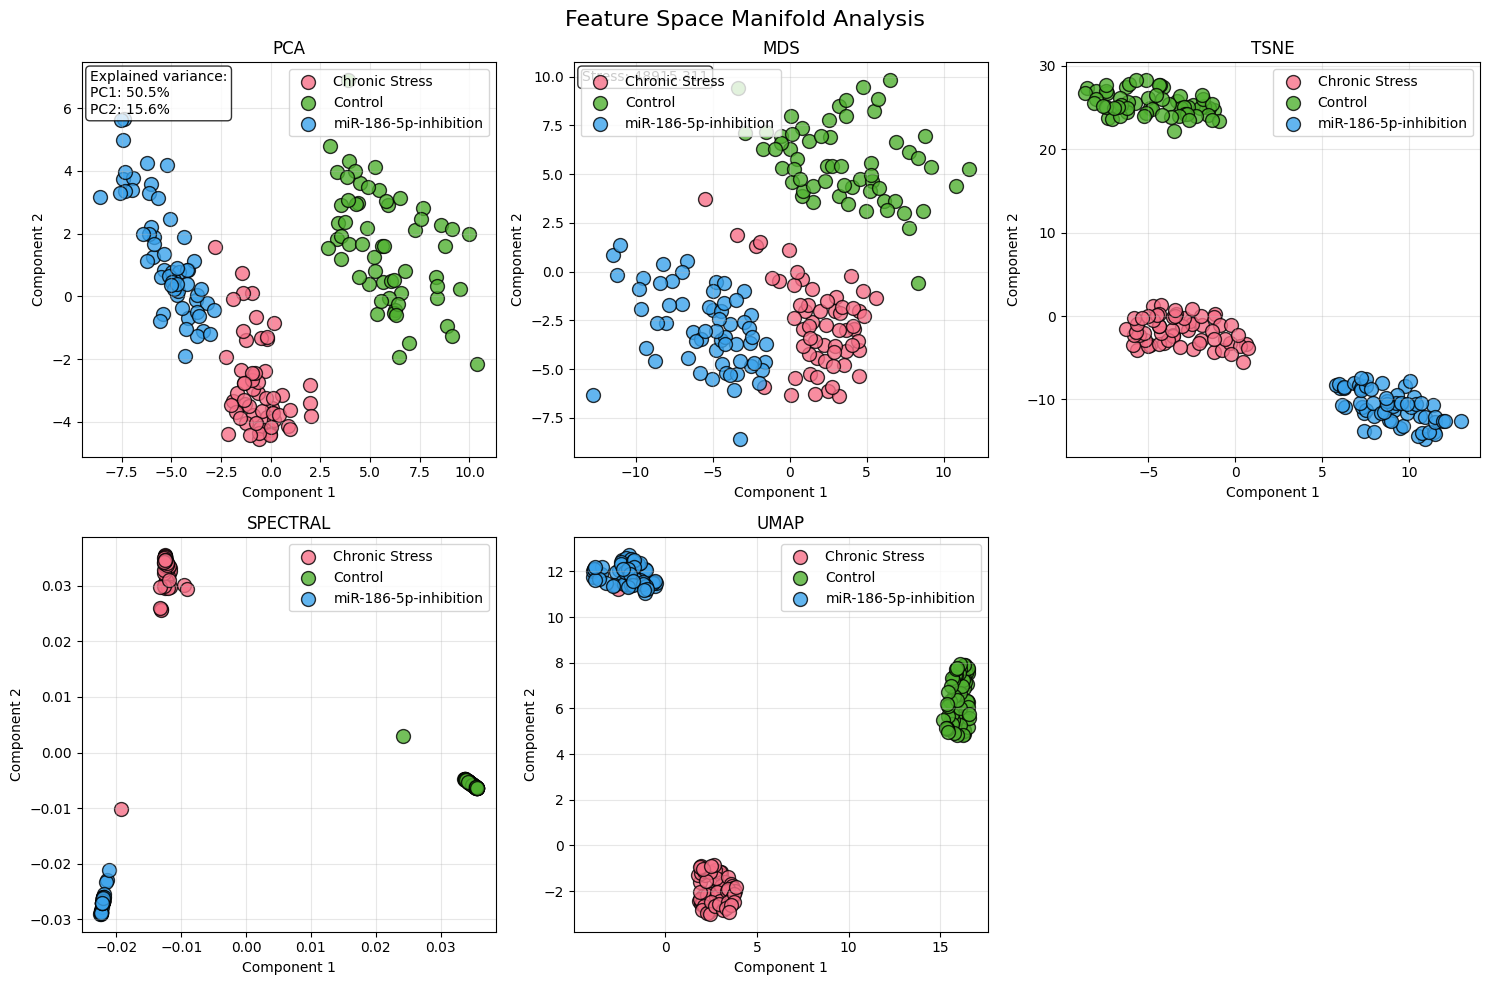

In [3]:
# Simple one-line analysis
results = analyze_feature_space(
    csv_path='results_temporal.csv',
    condition_column='condition',  # Replace with your actual condition column
    exclude_columns=['group_type', 'group_id', 'n_channels', 'recording_length'],  # Non-measurement columns to exclude
    methods=['PCA', 'MDS', 'TSNE', 'SPECTRAL', 'UMAP'],
    condition_names={'control': 'Control', 'chronic-stress': 'Chronic Stress', 'miR-186-5p-inhibition': 'miR-186-5p-inhibition'}  # Optional
)

Or, we can do a more fine-grained analysis, where we control each step ourselves.

/home/neuro/repos/mea-flow/src/mea_flow/analysis/feature_space.py:86: UserWarning: Found NaN values. Filling with column means.
  warnings.warn("Found NaN values. Filling with column means.")
/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: [40 41 42]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Data shape: (180, 45) (180 samples, 48 features)
Conditions: ['chronic-stress' 'control' 'miR-186-5p-inhibition']
Applying PCA...
Applying MDS...
Applying TSNE...
Applying SPECTRAL...
Applying UMAP...


/home/neuro/repos/mea-flow/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


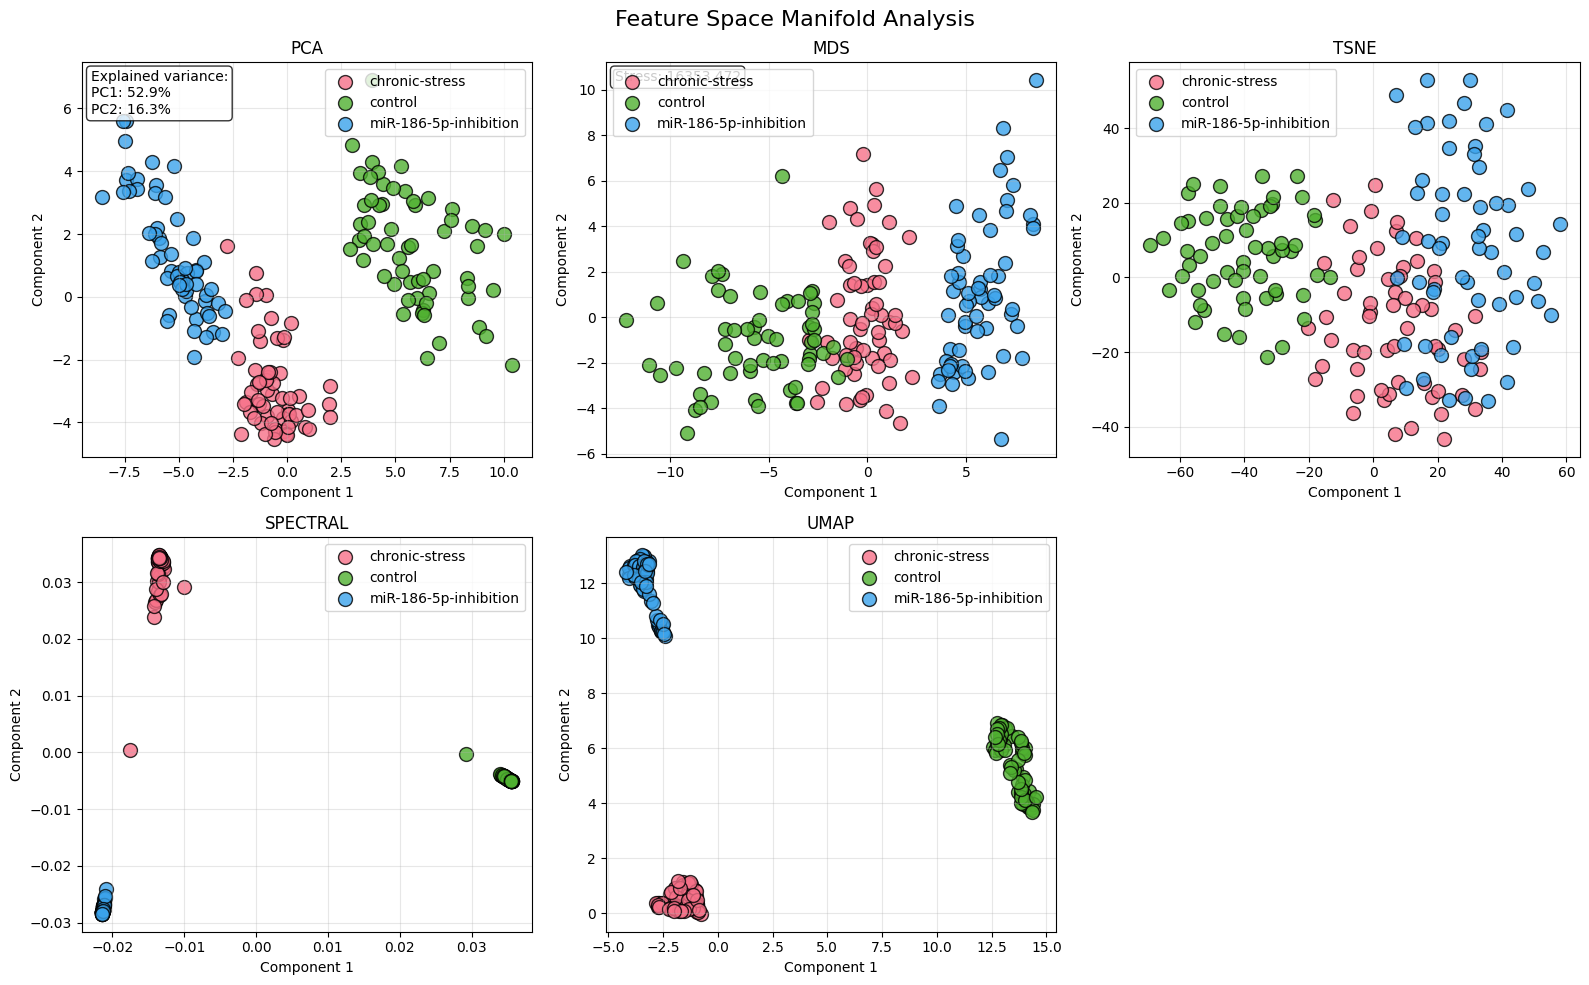


Top contributing features:
   component                   feature   loading  abs_loading  rank
0        PC1    pop_vector_length_mean  0.204913     0.204913     1
1        PC1       network_firing_rate  0.203465     0.203465     2
2        PC1         total_spike_count  0.203465     0.203465     3
3        PC1          mean_firing_rate  0.202126     0.202126     4
4        PC1          mean_spike_count  0.202126     0.202126     5
5        PC1              isi_distance  0.201573     0.201573     6
6        PC1           max_firing_rate  0.200000     0.200000     7
7        PC1        median_firing_rate  0.196413     0.196413     8
8        PC1           std_spike_count  0.192001     0.192001     9
9        PC1           std_firing_rate  0.192001     0.192001    10
10       PC2              lvr_isi_mean  0.347170     0.347170     1
11       PC2               lv_isi_mean  0.320699     0.320699     2
12       PC2             lv_isi_median  0.289190     0.289190     3
13       PC2        

In [4]:
from mea_flow.analysis import (
    load_feature_data, 
    apply_multiple_embeddings, 
    plot_feature_embeddings,
    get_feature_importance
)
import matplotlib.pyplot as plt

# Step 1: Load data
X, labels, feature_names = load_feature_data(
    csv_path='results_temporal.csv',
    condition_column='condition',
    exclude_columns=['group_type', 'group_id', 'n_channels', 'recording_length', 'window_start', 'window_end']
)

# Step 2: Apply embedding methods
embeddings, scaler = apply_multiple_embeddings(
    X, 
    methods=['PCA', 'MDS', 'TSNE', 'SPECTRAL', 'UMAP'],
    n_components=3
)

# Step 3: Create visualization
fig = plot_feature_embeddings(
    embeddings, 
    labels,
    # condition_names={0: 'Control', 1: 'Drug A', 2: 'Drug B'},
    figsize=(16, 10)
)
plt.show()

# Step 4: Get feature importance (for PCA)
if 'PCA' in embeddings:
    importance_df = get_feature_importance(
        embeddings['PCA'], 
        feature_names, 
        n_top=10
    )
    print("\nTop contributing features:")
    print(importance_df)


## 1) Feature importance 
The goal of these analysis is to determine which, among the many measurements/features allows a clearer differentiation between experimental conditions, thus indicating the most prevalent effects of the experimental manipulation. 



Below we demonstrate the feature importance analysis in some of these groupings


In [2]:
from mea_flow.analysis import get_available_methods

# Get list of all available methods
available_methods = get_available_methods()
print(available_methods)

/home/neuro/repos/mea-flow/src/mea_flow/analysis/synchrony.py:19: UserWarning: PySpike not available. Some synchrony metrics will be disabled.
  warnings.warn("PySpike not available. Some synchrony metrics will be disabled.")
/home/neuro/repos/mea-flow/src/mea_flow/manifold/embedding.py:26: UserWarning: UMAP not available. UMAP embedding will be disabled.
  warnings.warn("UMAP not available. UMAP embedding will be disabled.")


['RF', 'RANDOM_FOREST', 'LDA', 'LINEAR_DISCRIMINANT', 'SVM', 'LR', 'LOGISTIC', 'LOGISTIC_REGRESSION']


### Implemented Methods

1. **Random Forest (`"RF"`)**
Builds multiple decision trees and combines their votes. Uses feature importance based on how much each feature reduces impurity across all trees. Handles non-linear relationships and mixed data types robustly without overfitting.

2. **Linear Discriminant Analysis (`"LDA"`)**
Projects data to maximize class separation assuming linear boundaries and normal distributions. Feature importance comes from linear coefficients. Fast and interpretable but limited to linear relationships.

3. **Support Vector Machine (`"SVM"`)**
Finds optimal separating hyperplane using support vectors. Can handle non-linear boundaries with kernels. Feature importance available for linear kernels only. Works well with high-dimensional data.

4. **Logistic Regression (`"LR"`)**
Uses linear combination of features with sigmoid function to output probabilities. Feature importance from coefficient magnitudes. Fast and interpretable but limited to linear relationships.

---

#### **Recommendations for MEA Data:**
- **Start with Random Forest** - Most robust for complex neural data with non-linear relationships
- **Use LDA** - When you expect linear relationships between neural metrics and conditions
- **Try SVM** - For high-dimensional datasets (many electrodes/features) with clear class separation
- **Use Logistic Regression** - When you need probability estimates and suspect linear relationships

Begin with Random Forest for baseline results, then compare with LDA if interpretability is crucial. The compare_discriminant_methods() function lets you easily test multiple approaches and see which works best for your specific sdataset.

### Selecting the best method 

We will first analyze the richest dataset, where the analysis was done on multiple time windows, providing a substantial number of samples per feature. Let's compare how the different methods perform.

In [3]:
data = pd.read_csv('results_temporal.csv', index_col=0)
data

,condition,mean_firing_rate,std_firing_rate,median_firing_rate,max_firing_rate,min_firing_rate,total_spike_count,mean_spike_count,std_spike_count,active_channels_count,...,van_rossum_distance_std,chi_square_distance,population_spike_synchrony,synchrony_index,group_type,group_id,window_start,window_end,n_channels,recording_length
0,control,118.578125,73.364664,132.2,245.8,5.6,37945,592.890625,366.823319,64,...,122.685853,23.138120,0.339217,1.000,time,0,0.0,5.0,64,5.0
1,control,90.506250,56.154318,80.4,206.8,4.6,28962,452.531250,280.771591,64,...,117.723255,15.698743,0.272810,1.000,time,1,5.0,10.0,64,5.0
2,control,66.931250,44.010527,63.2,173.0,2.2,21418,334.656250,220.052637,64,...,111.959572,9.441962,0.216754,1.000,time,2,10.0,15.0,64,5.0
3,control,115.228571,76.108034,116.6,296.2,5.0,36297,576.142857,380.540170,63,...,144.012618,25.085127,0.300691,1.000,time,3,15.0,20.0,64,5.0
4,control,74.162500,50.038471,76.6,200.4,7.0,23732,370.812500,250.192356,64,...,108.492304,10.736002,0.236094,1.000,time,4,20.0,25.0,64,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,miR-186-5p-inhibition,8.629167,3.825570,8.0,17.4,2.6,2071,43.145833,19.127848,48,...,30.666677,5.546286,0.129847,0.344,time,55,275.0,280.0,58,5.0
176,miR-186-5p-inhibition,11.200000,8.325925,9.6,34.2,2.0,2184,56.000000,41.629625,39,...,43.706547,4.769777,0.122925,0.404,time,56,280.0,285.0,54,5.0
177,miR-186-5p-inhibition,14.264706,7.327903,12.9,37.4,2.8,2425,71.323529,36.639516,34,...,46.619028,5.252062,0.185287,0.374,time,57,285.0,290.0,44,5.0
178,miR-186-5p-inhibition,14.306122,7.936699,14.0,39.2,2.6,3505,71.530612,39.683494,49,...,46.866418,5.503381,0.137288,0.500,time,58,290.0,295.0,59,5.0


In [4]:
from mea_flow.analysis import (
    compare_discriminant_methods, 
    DiscriminantConfig, 
    get_available_methods
)
from mea_flow.visualization import (
    plot_method_comparison,
    plot_feature_importance_comparison
)

# Create base configuration
base_config = DiscriminantConfig(
    target_column="condition",
    exclude_columns=list(data.columns)[-6:],  # Non-feature columns
    scale_features=True,
    cross_validation=True,
    cv_folds=5
)

# Compare all methods
method_results = compare_discriminant_methods(
    data=data,
    base_config=base_config,
    methods=None  # Uses all available methods
)

# View results
for method_name, result in method_results.items():
    print(f"\n{method_name.upper()}:")
    print(f"  CV Accuracy: {result.model_performance['cv_mean_accuracy']:.3f} ± {result.model_performance['cv_std_accuracy']:.3f}")
    print(f"  Train Accuracy: {result.model_performance['train_accuracy']:.3f}")
    print(f"  Top 3 Features:")
    for i, row in result.feature_importance.head(3).iterrows():
        print(f"    {row['feature']}: {row['importance']:.3f}")


/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust imputation")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column isi_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_sync_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")



RANDOM_FOREST:
  CV Accuracy: 0.994 ± 0.011
  Train Accuracy: 1.000
  Top 3 Features:
    participation_ratio_mean: 0.087
    cv_isi_mean: 0.082
    cv_isi_std: 0.072

LINEAR_DISCRIMINANT:
  CV Accuracy: 1.000 ± 0.000
  Train Accuracy: 1.000
  Top 3 Features:
    population_cv: 0.224
    global_activity_cv: 0.219
    entropy_isi_mean: 0.078

SVM:
  CV Accuracy: 1.000 ± 0.000
  Train Accuracy: 1.000
  Top 3 Features:
    mean_firing_rate: 0.023
    std_firing_rate: 0.023
    median_firing_rate: 0.023

LOGISTIC_REGRESSION:
  CV Accuracy: 0.994 ± 0.011
  Train Accuracy: 1.000
  Top 3 Features:
    entropy_isi_std: 0.059
    participation_ratio_mean: 0.052
    lv_isi_median: 0.043


/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust imputation")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column isi_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_sync_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust im

/tmp/ipykernel_93976/3342975506.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()



Best method: linear_discriminant with 1.000 accuracy


/tmp/ipykernel_93976/3342975506.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


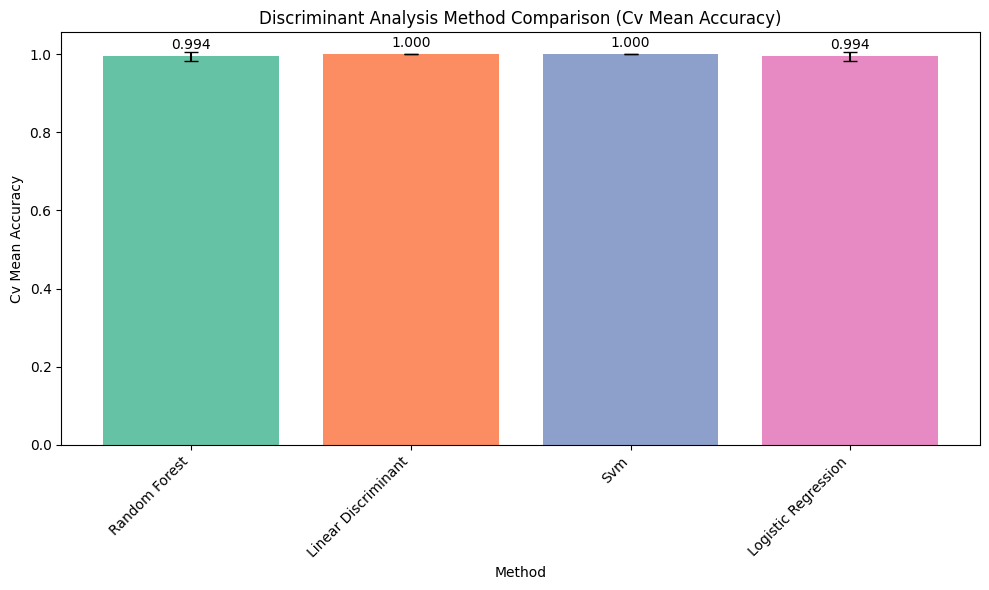

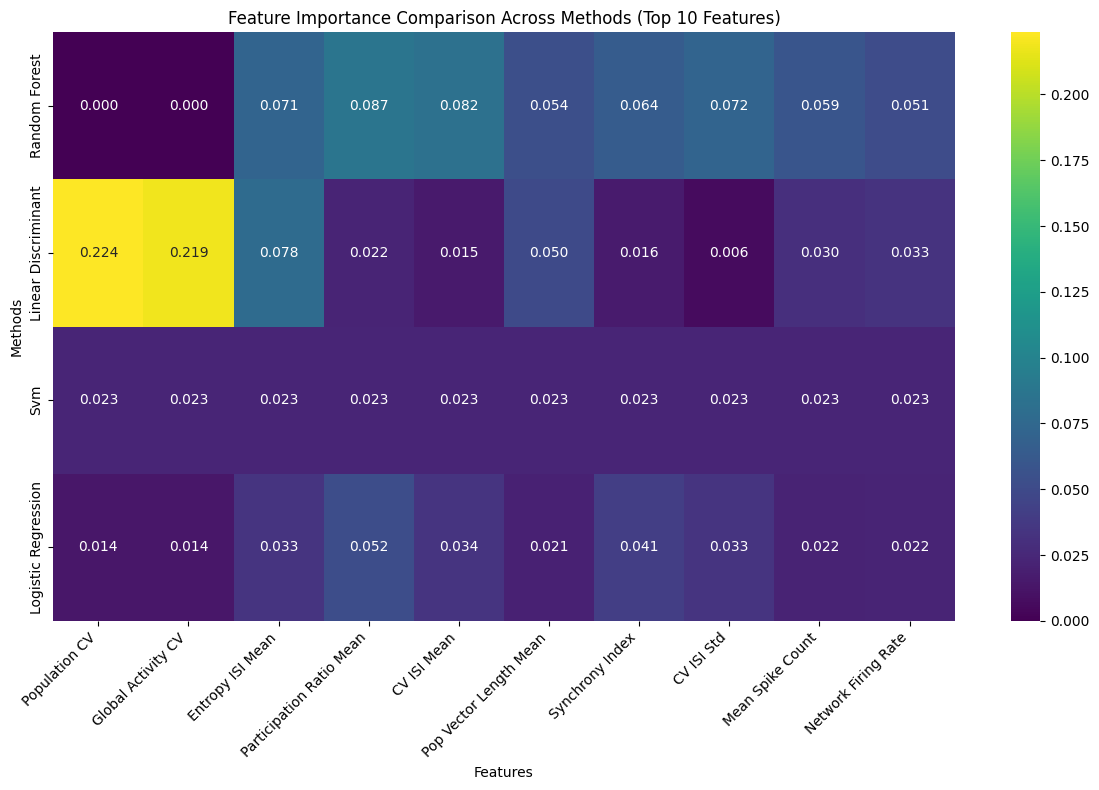

In [5]:
# Visualize method comparison
fig1 = plot_method_comparison(method_results, metric='cv_mean_accuracy')
fig1.show()

# Compare feature importance across methods
fig2 = plot_feature_importance_comparison(method_results, top_n=10)
fig2.show()

# Get best performing method
best_method = max(method_results.items(), 
                 key=lambda x: x[1].model_performance['cv_mean_accuracy'])
print(f"\nBest method: {best_method[0]} with {best_method[1].model_performance['cv_mean_accuracy']:.3f} accuracy")

### Using the best method (LDA)

For this dataset the method that was identified as most reliable was LDA. So, let's apply it separately.

/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust imputation")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column isi_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_sync_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/tmp/ipykernel_93976/4033074942.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


=== Linear Discriminant Analysis Results ===
Cross-validation accuracy: 1.000 ± 0.000
Training accuracy: 1.000

Top 10 Most Discriminative Features:
  31. population_cv            : 0.2236
  18. global_activity_cv       : 0.2186
  27. entropy_isi_mean         : 0.0777
  14. pop_vector_length_mean   : 0.0498
  42. chi_square_distance      : 0.0395
   6. total_spike_count        : 0.0330
  12. network_firing_rate      : 0.0330
   1. mean_firing_rate         : 0.0299
   7. mean_spike_count         : 0.0299
  43. population_spike_synchrony: 0.0243

Classification Report:
                       precision    recall  f1-score   support

       chronic-stress       1.00      1.00      1.00        60
              control       1.00      1.00      1.00        60
miR-186-5p-inhibition       1.00      1.00      1.00        60

             accuracy                           1.00       180
            macro avg       1.00      1.00      1.00       180
         weighted avg       1.00      1.00    

/tmp/ipykernel_93976/4033074942.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


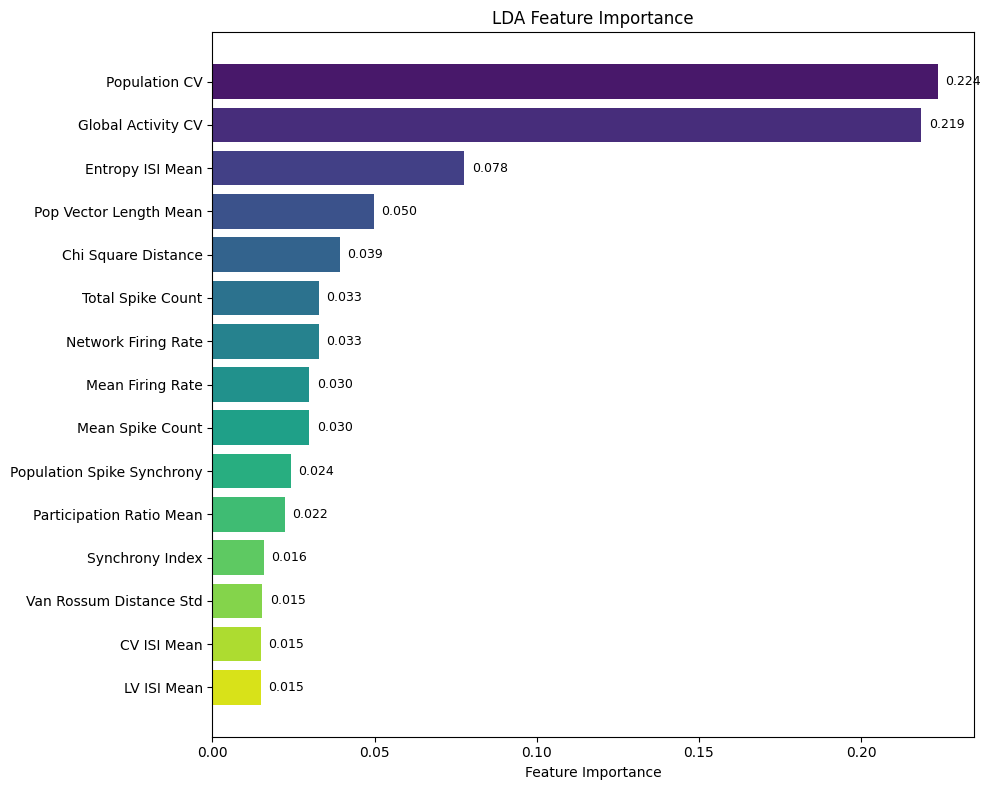

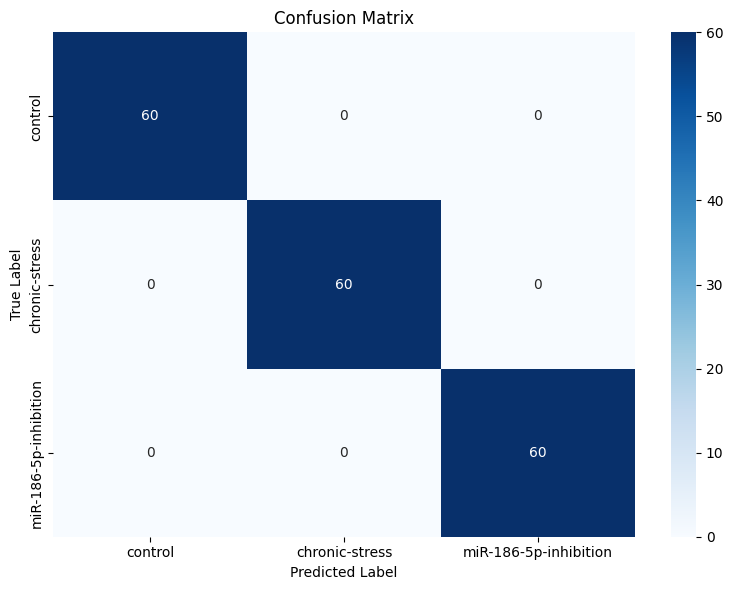

In [6]:
from mea_flow.analysis import identify_discriminative_features, DiscriminantConfig
from mea_flow.visualization import plot_feature_importance, plot_confusion_matrix

# Configure the best method (Linear Discriminant Analysis)
config = DiscriminantConfig(
    method="LDA",  # Best performing method
    target_column="condition",
    exclude_columns=list(data.columns)[-6:],
    scale_features=True,
    cross_validation=True,
    cv_folds=5
)
# Run discriminant analysis
results = identify_discriminative_features(data, config)

# Print performance metrics
print("=== Linear Discriminant Analysis Results ===")
print(f"Cross-validation accuracy: {results.model_performance['cv_mean_accuracy']:.3f} ± {results.model_performance['cv_std_accuracy']:.3f}")
print(f"Training accuracy: {results.model_performance['train_accuracy']:.3f}")

# Show top discriminative features
print(f"\nTop 10 Most Discriminative Features:")
for i, row in results.feature_importance.head(10).iterrows():
    print(f"  {i+1:2d}. {row['feature']:25s}: {row['importance']:.4f}")

# Visualize feature importance
fig1 = plot_feature_importance(results, top_n=15, title="LDA Feature Importance")
fig1.show()

# Show confusion matrix
conditions = ['control', 'chronic-stress', 'miR-186-5p-inhibition']
fig2 = plot_confusion_matrix(results, class_names=conditions, figsize=(8, 6))
fig2.show()

# Print classification report
print(f"\nClassification Report:")
print(results.classification_report)

# Access the trained model for further analysis
trained_model = results.model
print(f"\nModel type: {type(trained_model).__name__}")
print(f"Number of components: {trained_model.n_components}")

## Conclusion

For this dataset, the irregularity of spiking activity (as measured by the CV-ISI) is the most discriminative feature, indicating that modulating firing profile is the most significant effect of the experimental manipulation. Using this conclusion, we can plot a focused comparison.

Plot saved to: most_discriminative_features.png


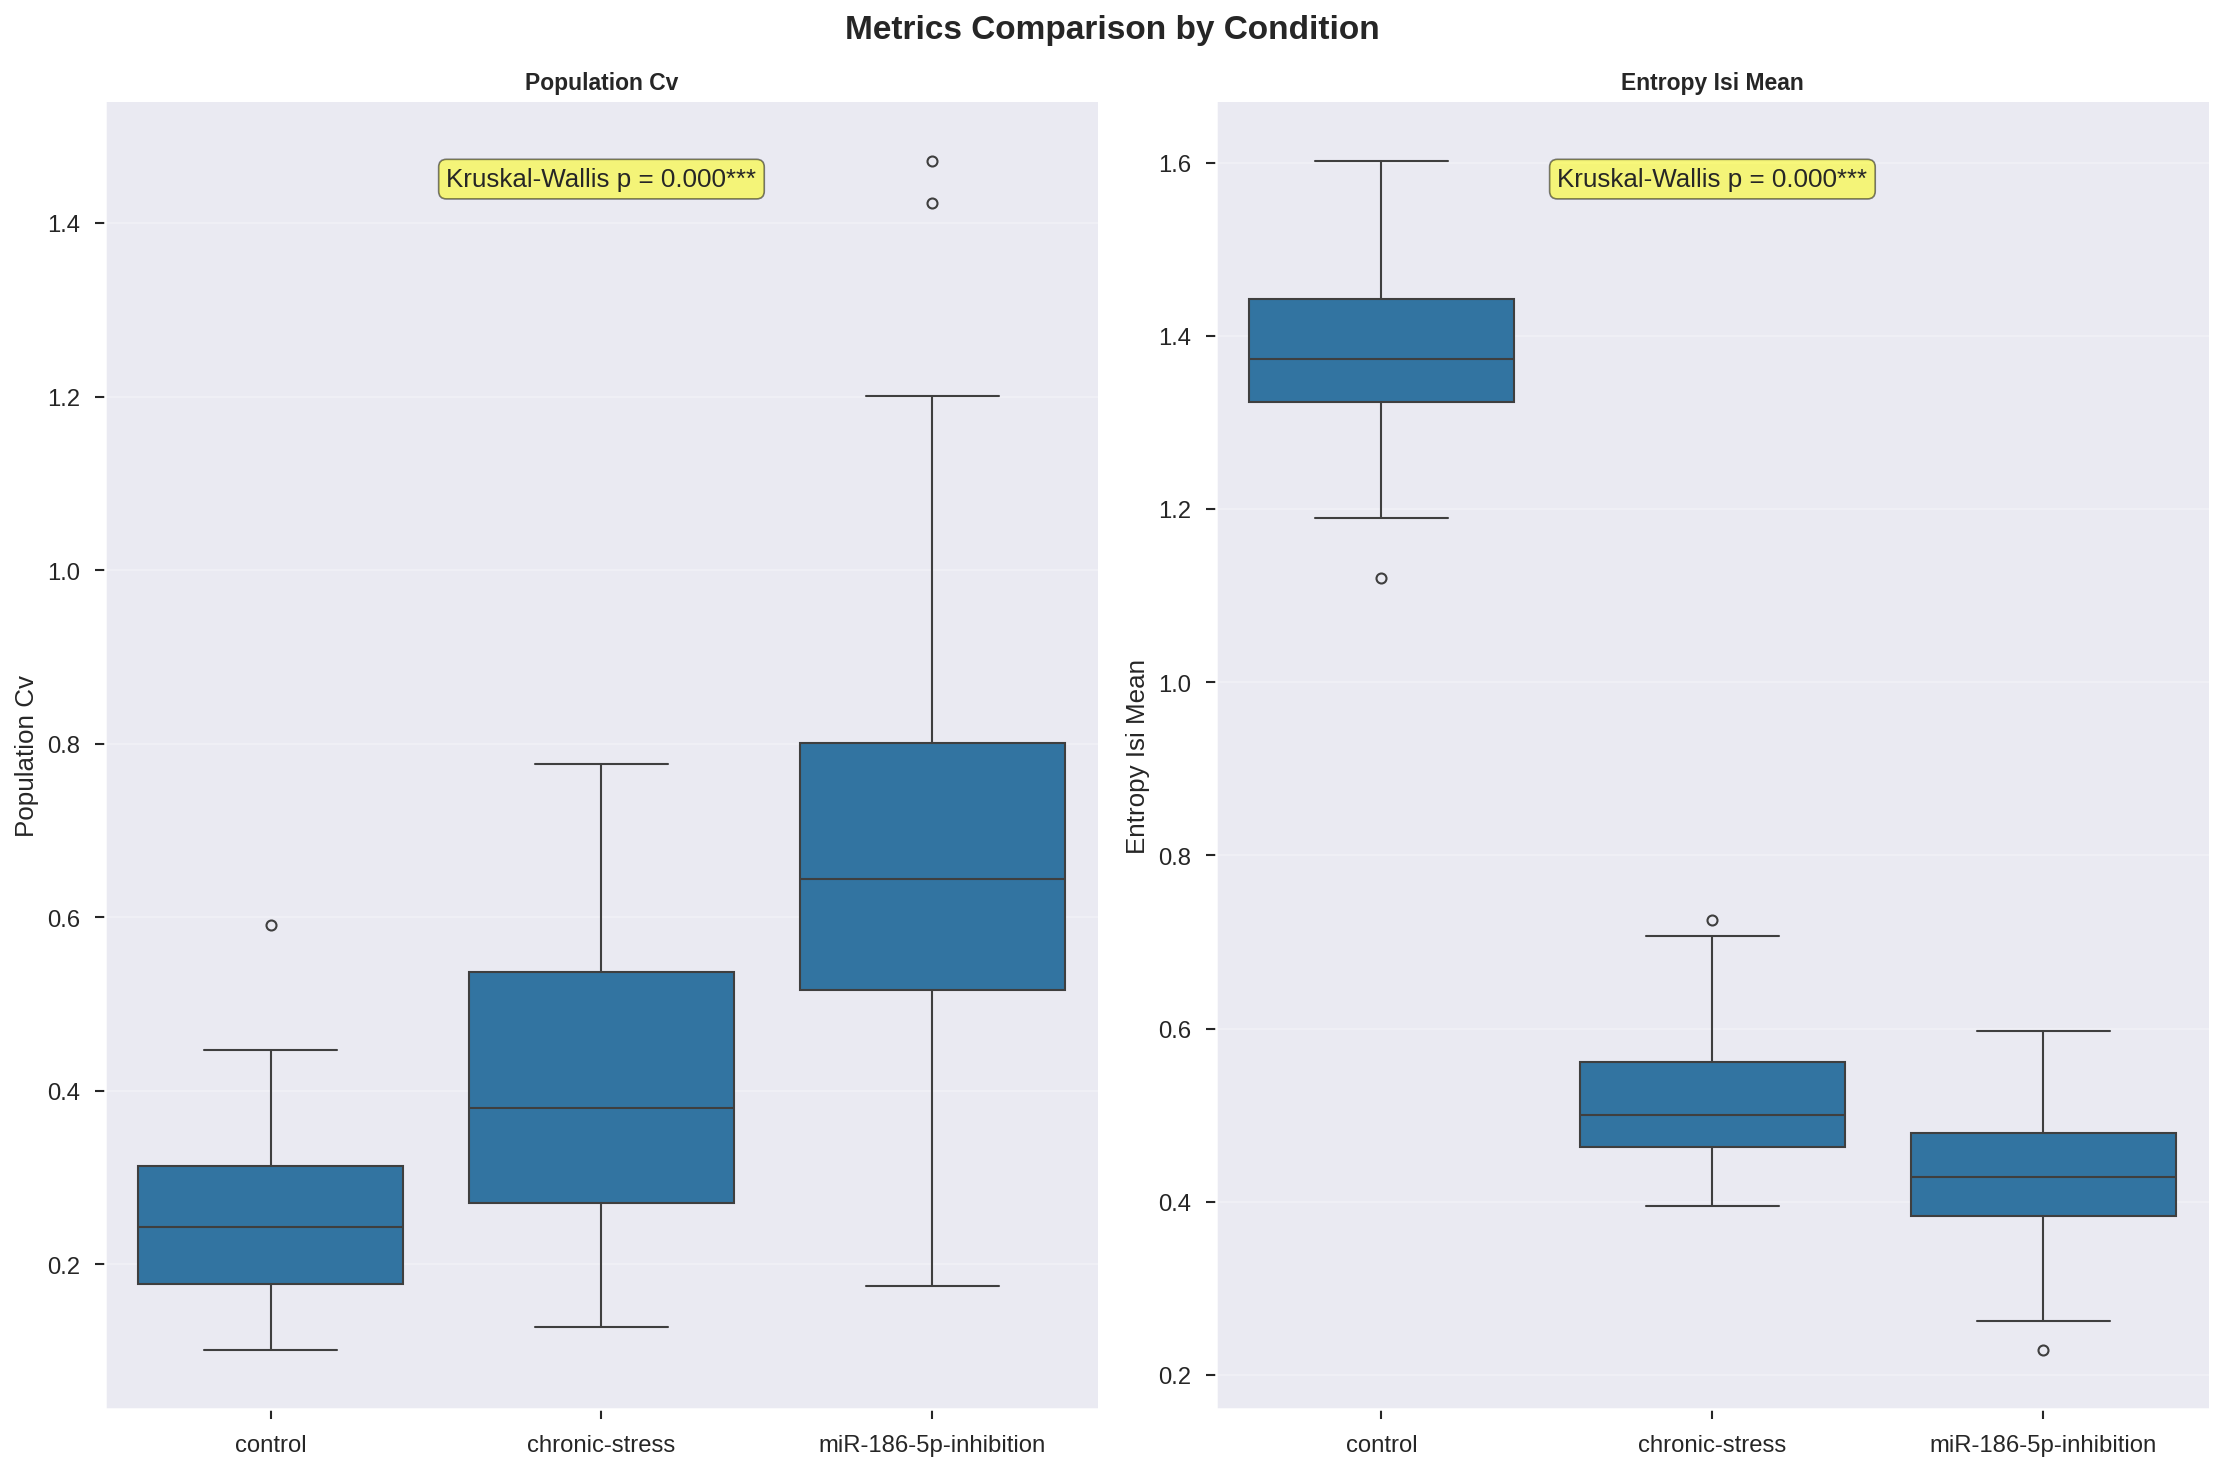

In [7]:
from mea_flow.visualization import MEAPlotter
plotter = MEAPlotter()

# Activity comparison across conditions
plotter.plot_metrics_comparison(
    results_temporal, 
    metrics=['population_cv', 'entropy_isi_mean'],
    group_by='condition',
    save_path='most_discriminative_features.png'
)

---

### Let's look at a less sample-rich dataset

In [8]:
results_global

,Unnamed: 0,condition,mean_firing_rate,std_firing_rate,median_firing_rate,max_firing_rate,min_firing_rate,total_spike_count,mean_spike_count,std_spike_count,...,network_burst_spikes_mean,network_burst_spikes_std,network_burst_peak_activity_mean,network_burst_peak_activity_std,inter_network_burst_interval_mean,inter_network_burst_interval_std,group_type,group_id,n_channels,recording_length
0,0,control,92.690914,26.808077,91.244596,160.407216,44.760928,1957618,30587.781250,8846.601592,...,3790.100719,3417.634163,151.381295,24.971464,2.162899,2.238878,global,all,64,329.997624
1,1,chronic-stress,38.418214,10.569137,38.153580,62.455445,18.548752,811381,12677.828125,3487.764912,...,1247.915556,1024.560080,95.160000,23.633520,1.327723,1.112842,global,all,64,329.995248
2,2,miR-186-5p-inhibition,10.042631,3.238903,9.654927,18.706799,4.421387,212092,3313.937500,1068.795860,...,553.257576,359.466010,53.840909,14.377397,2.259847,2.659705,global,all,64,329.986976


In [9]:
# Create base configuration
base_config = DiscriminantConfig(
    target_column="condition",
    exclude_columns=list(results_global.columns)[-4:],  # Non-feature columns
    scale_features=True,
    cross_validation=True,
    cv_folds=5
)

# Compare all methods
method_results = compare_discriminant_methods(
    data=results_global,
    base_config=base_config,
    methods=None  # Uses all available methods
)

# View results
for method_name, result in method_results.items():
    print(f"\n{method_name.upper()}:")
    print(f"  CV Accuracy: {result.model_performance['cv_mean_accuracy']:.3f} ± {result.model_performance['cv_std_accuracy']:.3f}")
    print(f"  Train Accuracy: {result.model_performance['train_accuracy']:.3f}")
    print(f"  Top 3 Features:")
    for i, row in result.feature_importance.head(3).iterrows():
        print(f"    {row['feature']}: {row['importance']:.3f}")


RANDOM_FOREST:
  CV Accuracy: nan ± nan
  Train Accuracy: 1.000
  Top 3 Features:
    lv_isi_std: 0.047
    lv_isi_mean: 0.047
    network_firing_rate: 0.047

SVM:
  CV Accuracy: nan ± nan
  Train Accuracy: 1.000
  Top 3 Features:
    Unnamed: 0: 0.014
    mean_firing_rate: 0.014
    std_firing_rate: 0.014

LOGISTIC_REGRESSION:
  CV Accuracy: nan ± nan
  Train Accuracy: 1.000
  Top 3 Features:
    pearson_cc_max: 0.023
    network_burst_rate: 0.023
    network_burst_count: 0.023


/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust imputation")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column isi_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_sync_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:210: UserWarning: Reducing CV folds from 5 to 2 due to small dataset size
  warnings.warn(f"Reducing CV folds from {config.cv_folds} t

/tmp/ipykernel_93976/3342975506.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()



Best method: random_forest with nan accuracy


/tmp/ipykernel_93976/3342975506.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


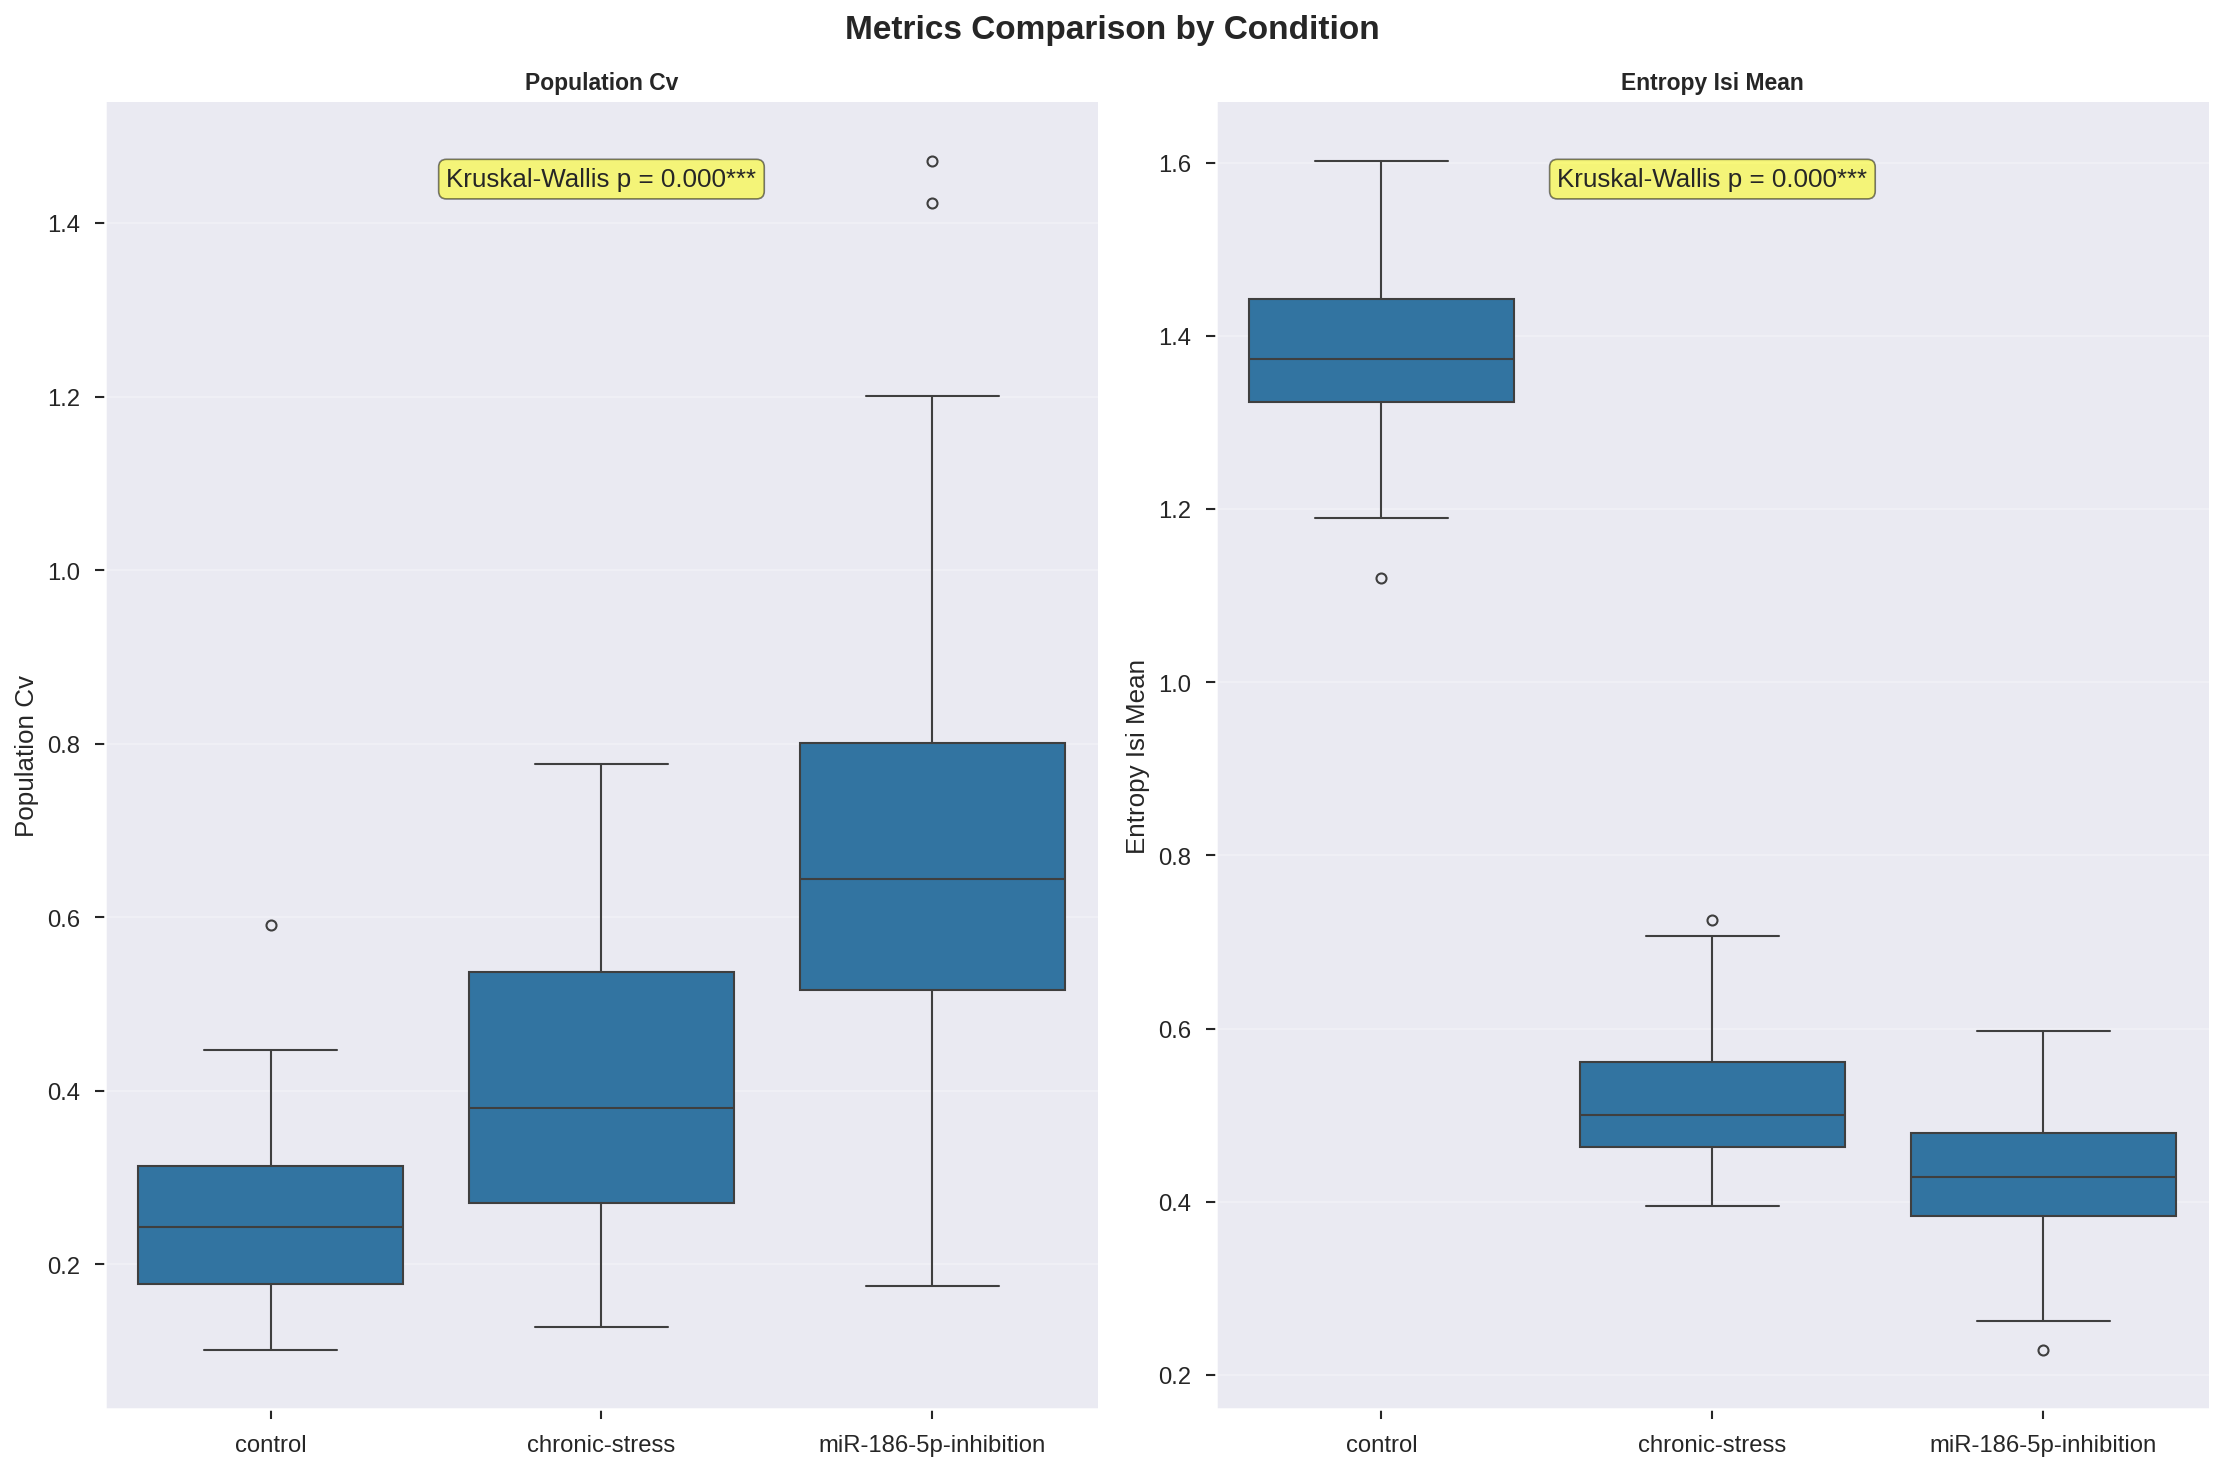

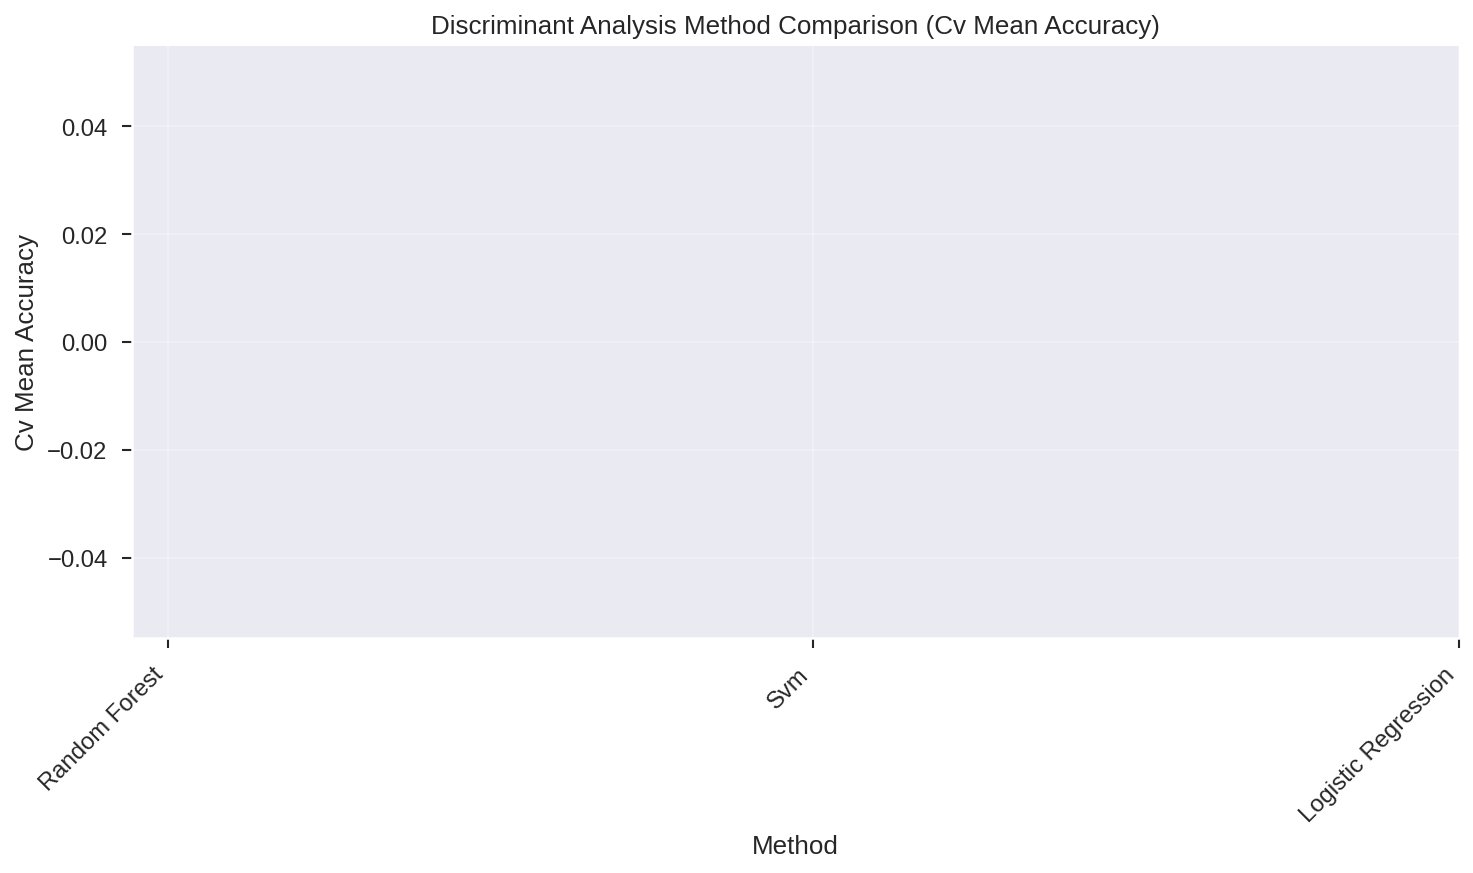

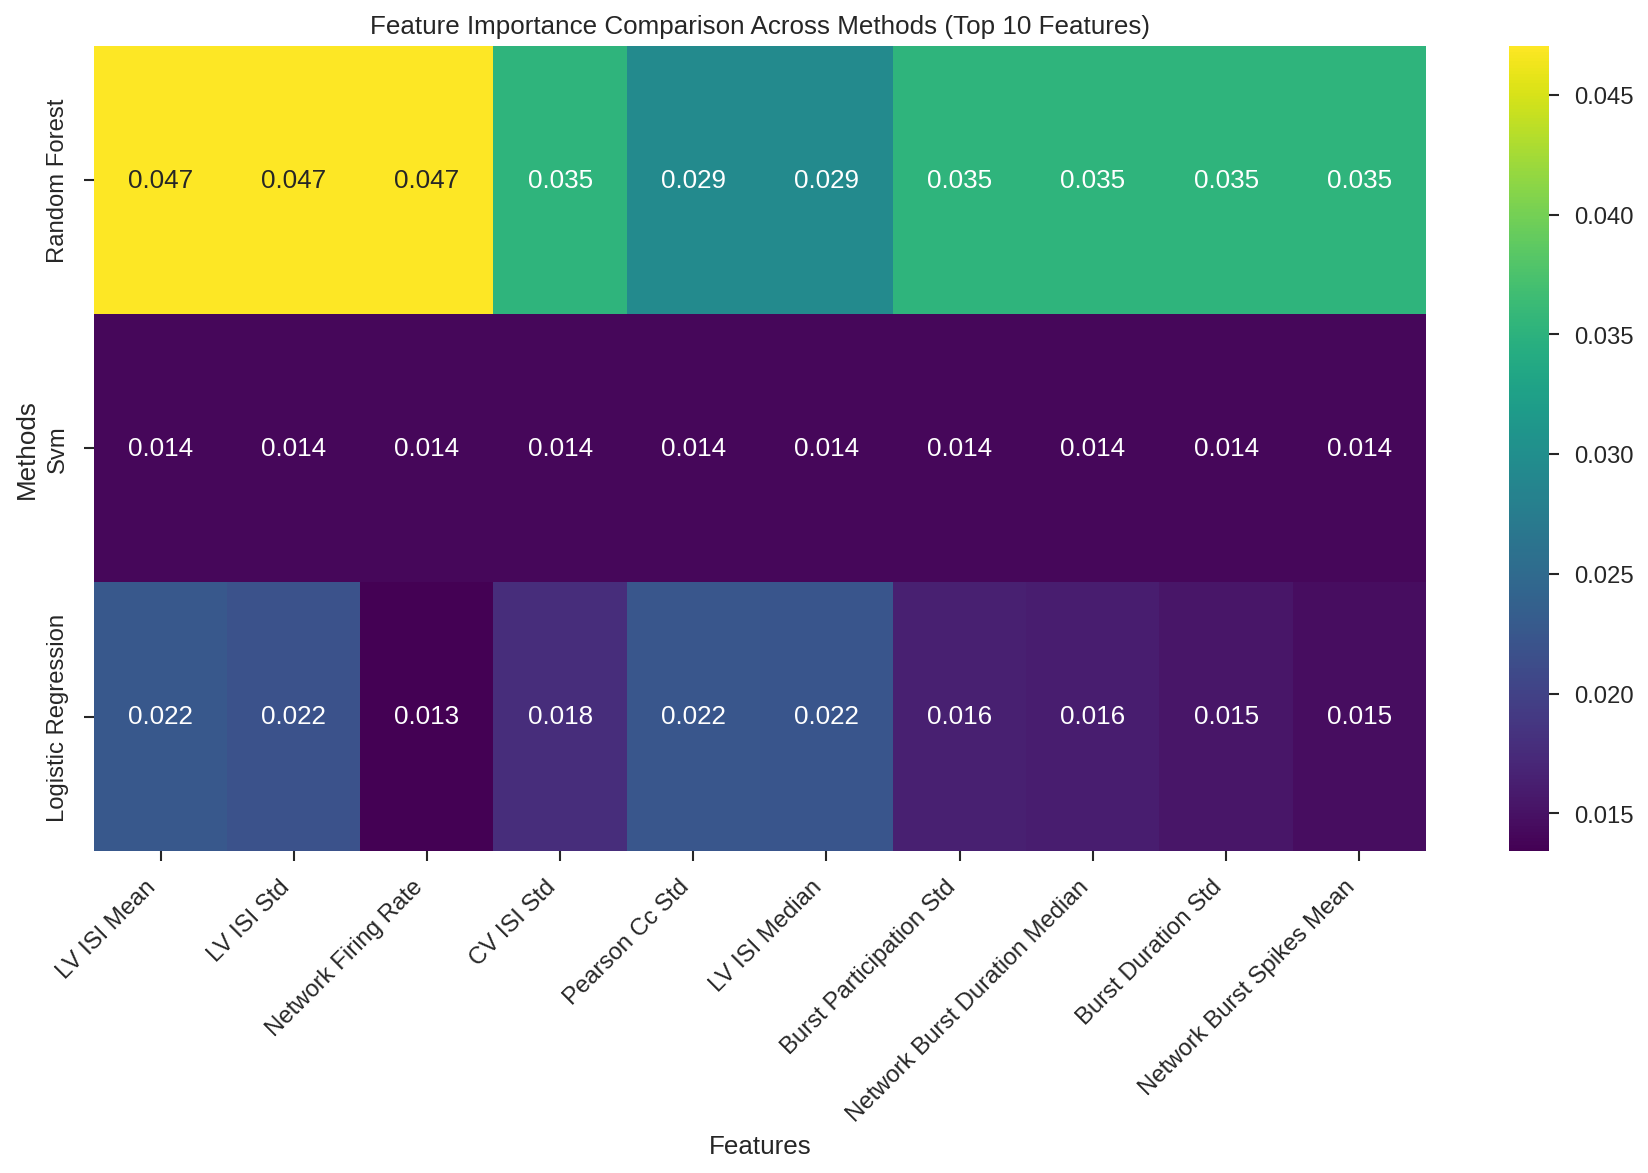

In [10]:
# Visualize method comparison
fig1 = plot_method_comparison(method_results, metric='cv_mean_accuracy')
fig1.show()

# Compare feature importance across methods
fig2 = plot_feature_importance_comparison(method_results, top_n=10)
fig2.show()

# Get best performing method
best_method = max(method_results.items(), 
                 key=lambda x: x[1].model_performance['cv_mean_accuracy'])
print(f"\nBest method: {best_method[0]} with {best_method[1].model_performance['cv_mean_accuracy']:.3f} accuracy")

In [11]:
results_wells

,Unnamed: 0,condition,mean_firing_rate,std_firing_rate,median_firing_rate,max_firing_rate,min_firing_rate,total_spike_count,mean_spike_count,std_spike_count,...,network_burst_spikes_mean,network_burst_spikes_std,network_burst_peak_activity_mean,network_burst_peak_activity_std,inter_network_burst_interval_mean,inter_network_burst_interval_std,group_type,group_id,n_channels,recording_length
0,0,control,104.466472,29.450876,112.193232,160.407216,44.760928,551579,34473.6875,9718.719255,...,2114.163793,1166.851651,74.844828,18.861840,2.578870,2.183213,well,1,16,329.997624
1,1,control,92.306346,18.012014,92.023390,122.300881,54.867062,487374,30460.8750,5943.921842,...,1787.693548,1243.703044,68.056452,15.311445,2.391220,2.718266,well,2,16,329.997624
2,2,control,99.640490,29.016119,94.946138,140.613134,55.257974,526098,32881.1250,9575.250172,...,1724.700000,1345.219375,70.078571,18.680038,2.148129,2.850874,well,3,16,329.997624
3,3,control,74.350346,17.818117,78.285412,116.334171,45.306387,392567,24535.4375,5879.936160,...,1967.100000,1080.491985,67.780000,14.234170,2.938081,3.494623,well,4,16,329.997624
4,4,chronic-stress,40.369331,8.119638,39.405113,62.243321,21.445763,213147,13321.6875,2679.441820,...,946.281046,594.239322,60.065359,12.176090,1.954211,1.367024,well,1,16,329.995248
5,5,chronic-stress,29.549289,6.964447,28.570108,45.352168,19.512402,156018,9751.1250,2298.234319,...,795.858108,373.334826,54.418919,11.784101,2.024694,2.091276,well,2,16,329.995248
6,6,chronic-stress,45.367699,9.953745,41.999090,62.455445,30.985295,239538,14971.1250,3284.688605,...,858.097826,566.042796,56.233696,13.972207,1.588142,1.857207,well,3,16,329.995248
7,7,chronic-stress,38.386538,10.127019,39.806634,56.670513,18.548752,202678,12667.3750,3341.868001,...,908.697183,577.887642,59.612676,12.314453,2.049291,1.359245,well,4,16,329.995248
8,8,miR-186-5p-inhibition,9.064941,2.627480,8.788226,16.182457,5.551734,47861,2991.3125,867.034149,...,479.178082,218.815951,43.958904,9.832067,4.061806,2.963938,well,1,16,329.986976
9,9,miR-186-5p-inhibition,9.978424,3.197600,9.157937,15.164235,5.248692,52684,3292.7500,1055.166190,...,422.988764,182.098781,36.696629,9.418371,3.162273,5.327819,well,2,16,329.986976


In [12]:
# Create base configuration
base_config = DiscriminantConfig(
    target_column="condition",
    exclude_columns=list(results_wells.columns)[-4:],  # Non-feature columns
    scale_features=True,
    cross_validation=True,
    cv_folds=5
)

# Compare all methods
method_results = compare_discriminant_methods(
    data=results_wells,
    base_config=base_config,
    methods=None  # Uses all available methods
)

# View results
for method_name, result in method_results.items():
    print(f"\n{method_name.upper()}:")
    print(f"  CV Accuracy: {result.model_performance['cv_mean_accuracy']:.3f} ± {result.model_performance['cv_std_accuracy']:.3f}")
    print(f"  Train Accuracy: {result.model_performance['train_accuracy']:.3f}")
    print(f"  Top 3 Features:")
    for i, row in result.feature_importance.head(3).iterrows():
        print(f"    {row['feature']}: {row['importance']:.3f}")

/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust imputation")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column isi_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_sync_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:210: UserWarning: Reducing CV folds from 5 to 4 due to small dataset size
  warnings.warn(f"Reducing CV folds from {config.cv_folds} t


RANDOM_FOREST:
  CV Accuracy: 1.000 ± 0.000
  Train Accuracy: 1.000
  Top 3 Features:
    lvr_isi_mean: 0.041
    network_burst_count: 0.037
    inter_network_burst_interval_mean: 0.035

LINEAR_DISCRIMINANT:
  CV Accuracy: 1.000 ± 0.000
  Train Accuracy: 1.000
  Top 3 Features:
    network_burst_spikes_mean: 0.102
    fano_factor_mean: 0.071
    synchrony_index: 0.059

SVM:
  CV Accuracy: 1.000 ± 0.000
  Train Accuracy: 1.000
  Top 3 Features:
    Unnamed: 0: 0.014
    mean_firing_rate: 0.014
    std_firing_rate: 0.014

LOGISTIC_REGRESSION:
  CV Accuracy: 1.000 ± 0.000
  Train Accuracy: 1.000
  Top 3 Features:
    lv_isi_mean: 0.026
    lvr_isi_mean: 0.026
    lv_isi_median: 0.025


/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust imputation")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column isi_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_sync_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:210: UserWarning: Reducing CV folds from 5 to 4 due to small dataset size
  warnings.warn(f"Reducing CV folds from {config.cv_folds} t

/tmp/ipykernel_93976/3342975506.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()



Best method: random_forest with 1.000 accuracy


/tmp/ipykernel_93976/3342975506.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


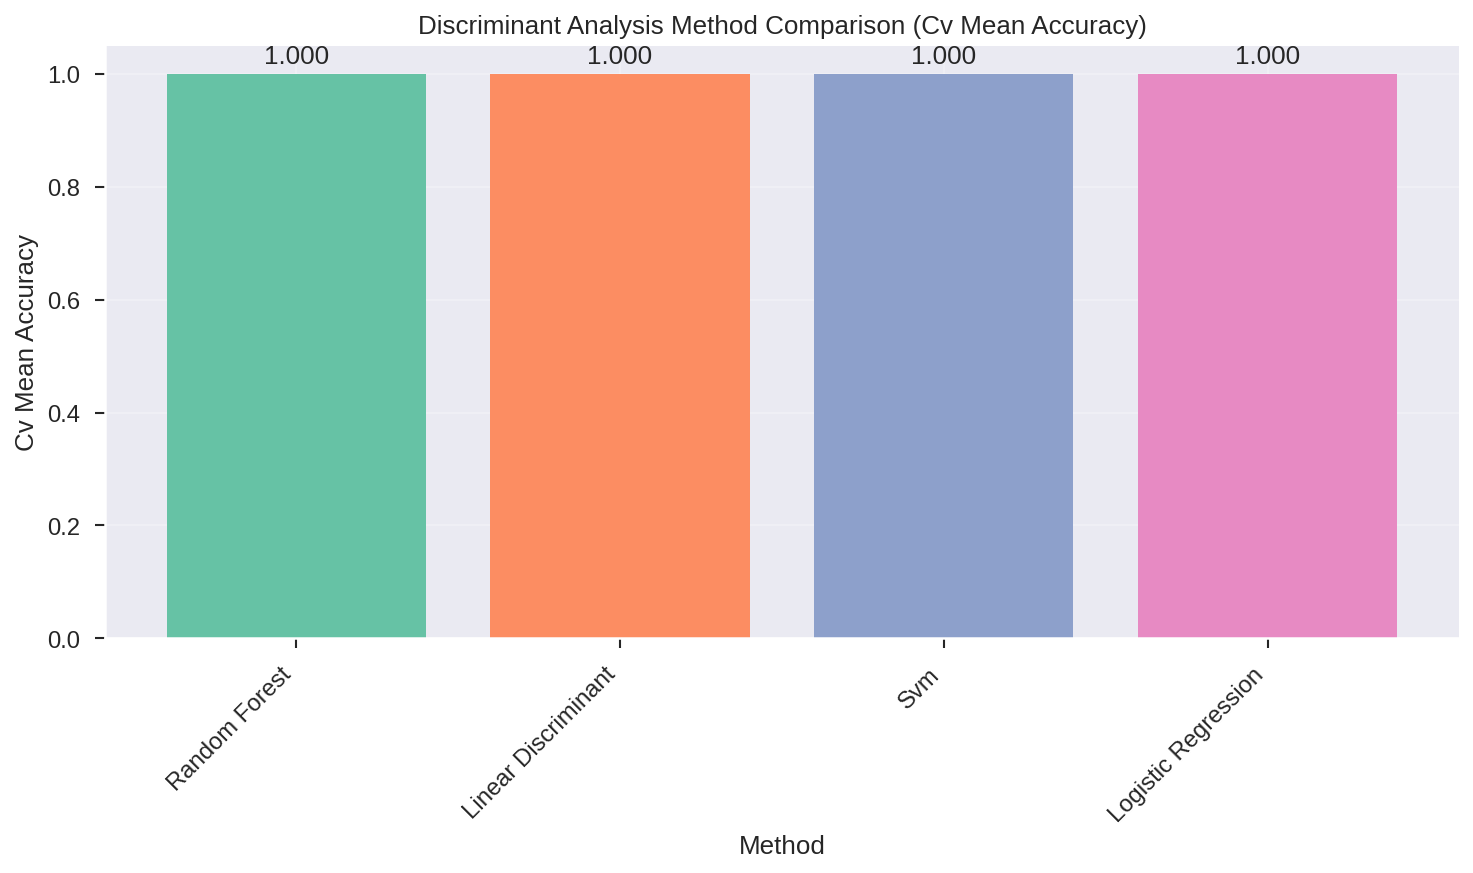

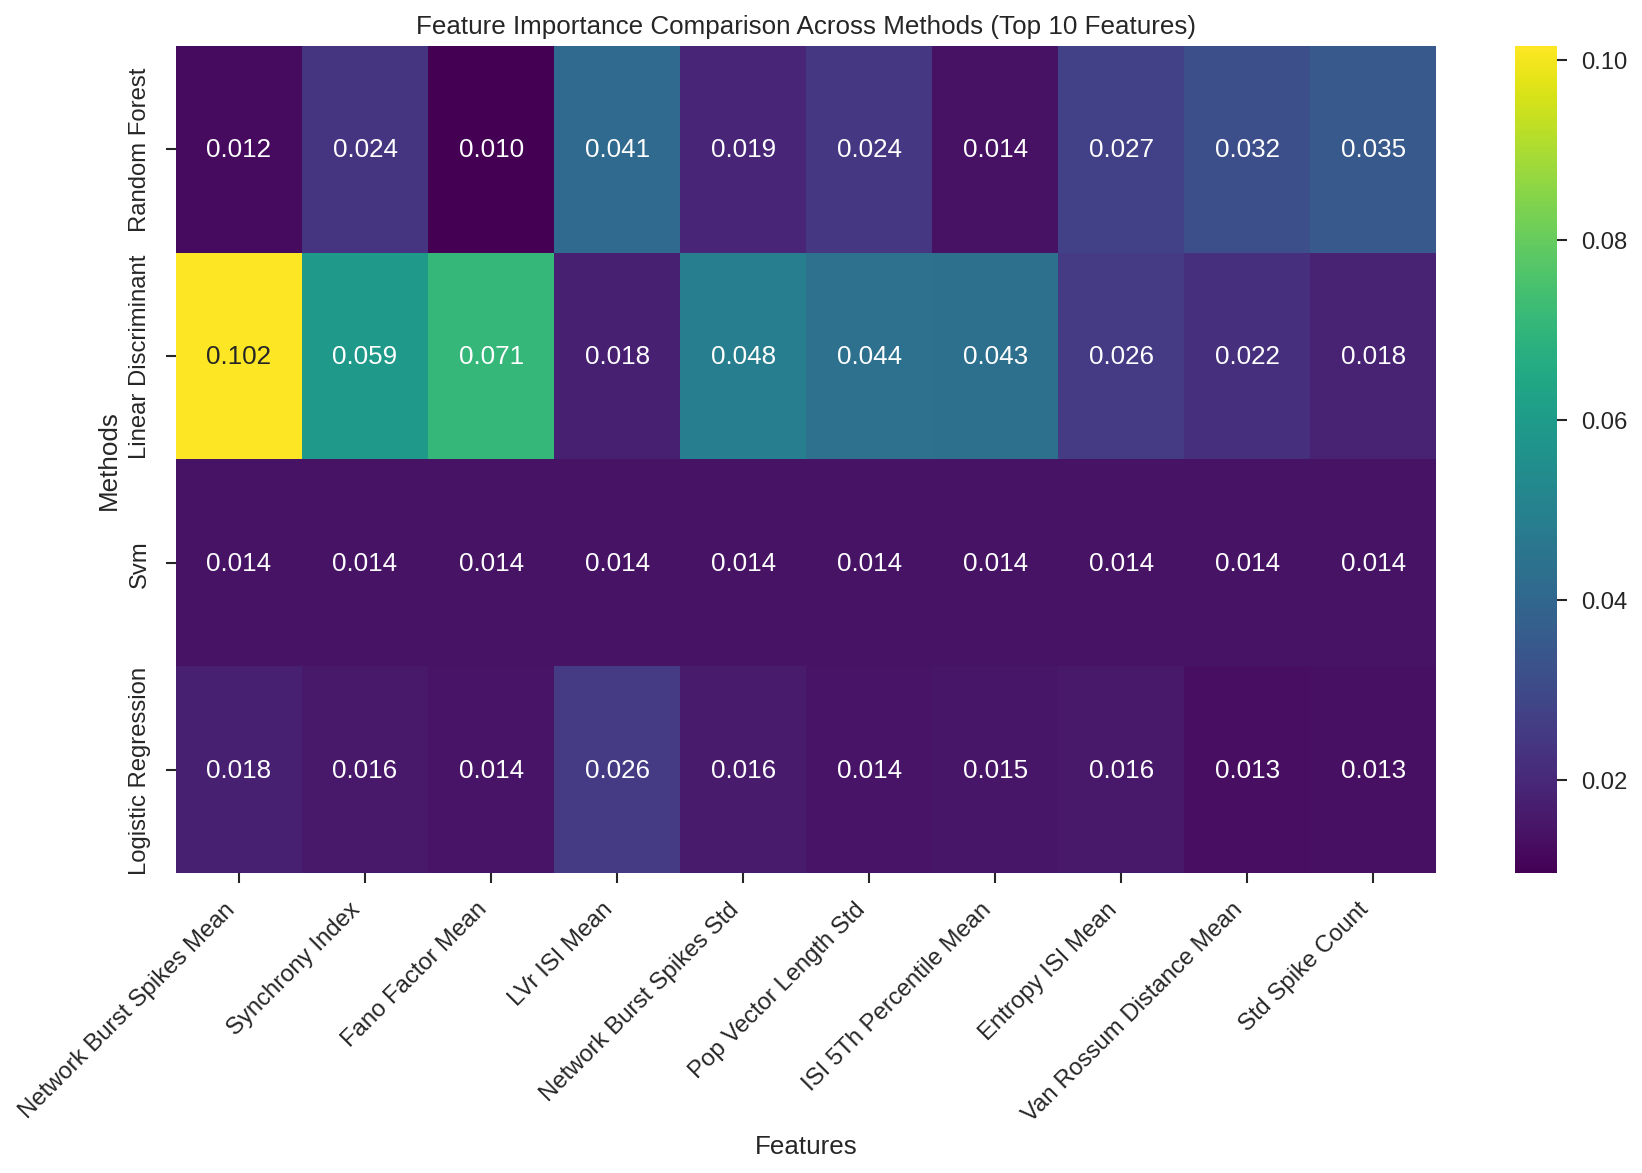

In [ ]:
# Visualize method comparison
fig1 = plot_method_comparison(method_results, metric='cv_mean_accuracy')

# Compare feature importance across methods
fig2 = plot_feature_importance_comparison(method_results, top_n=10)

# Get best performing method
best_method = max(method_results.items(), 
                 key=lambda x: x[1].model_performance['cv_mean_accuracy'])
print(f"\nBest method: {best_method[0]} with {best_method[1].model_performance['cv_mean_accuracy']:.3f} accuracy")

--- 

And let's complete with the most comprehensive dataset, where each channel is independently analysed

In [14]:
results_channels

,Unnamed: 0,condition,mean_firing_rate,std_firing_rate,median_firing_rate,max_firing_rate,min_firing_rate,total_spike_count,mean_spike_count,std_spike_count,...,pearson_cc_std,isi_distance,spike_distance,spike_sync_distance,group_type,group_id,channel_id,n_channels,recording_length,well_id
0,0,control,44.760928,0.0,44.760928,44.760928,44.760928,14771,14771.0,0.0,...,NaN,NaN,NaN,NaN,channel,0,0,1,329.997624,1
1,1,control,119.955409,0.0,119.955409,119.955409,119.955409,39585,39585.0,0.0,...,NaN,NaN,NaN,NaN,channel,1,1,1,329.997624,1
2,2,control,97.152215,0.0,97.152215,97.152215,97.152215,32060,32060.0,0.0,...,NaN,NaN,NaN,NaN,channel,2,2,1,329.997624,1
3,3,control,59.973159,0.0,59.973159,59.973159,59.973159,19791,19791.0,0.0,...,NaN,NaN,NaN,NaN,channel,3,3,1,329.997624,1
4,4,control,160.407216,0.0,160.407216,160.407216,160.407216,52934,52934.0,0.0,...,NaN,NaN,NaN,NaN,channel,4,4,1,329.997624,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,miR-186-5p-inhibition,9.594318,0.0,9.594318,9.594318,9.594318,3166,3166.0,0.0,...,NaN,NaN,NaN,NaN,channel,59,59,1,329.986976,4
188,188,miR-186-5p-inhibition,15.573342,0.0,15.573342,15.573342,15.573342,5139,5139.0,0.0,...,NaN,NaN,NaN,NaN,channel,60,60,1,329.986976,4
189,189,miR-186-5p-inhibition,4.421387,0.0,4.421387,4.421387,4.421387,1459,1459.0,0.0,...,NaN,NaN,NaN,NaN,channel,61,61,1,329.986976,4
190,190,miR-186-5p-inhibition,14.073283,0.0,14.073283,14.073283,14.073283,4644,4644.0,0.0,...,NaN,NaN,NaN,NaN,channel,62,62,1,329.986976,4


In [15]:
# Create base configuration
base_config = DiscriminantConfig(
    target_column="condition",
    exclude_columns=list(results_global.columns)[-6:],  # Non-feature columns
    scale_features=True,
    cross_validation=True,
    cv_folds=5
)

# Compare all methods
method_results = compare_discriminant_methods(
    data=results_global,
    base_config=base_config,
    methods=None  # Uses all available methods
)

# View results
for method_name, result in method_results.items():
    print(f"\n{method_name.upper()}:")
    print(f"  CV Accuracy: {result.model_performance['cv_mean_accuracy']:.3f} ± {result.model_performance['cv_std_accuracy']:.3f}")
    print(f"  Train Accuracy: {result.model_performance['train_accuracy']:.3f}")
    print(f"  Top 3 Features:")
    for i, row in result.feature_importance.head(3).iterrows():
        print(f"    {row['feature']}: {row['importance']:.3f}")


RANDOM_FOREST:
  CV Accuracy: nan ± nan
  Train Accuracy: 1.000
  Top 3 Features:
    network_burst_count: 0.047
    chi_square_distance: 0.041
    population_cv: 0.035

SVM:
  CV Accuracy: nan ± nan
  Train Accuracy: 1.000
  Top 3 Features:
    Unnamed: 0: 0.014
    mean_firing_rate: 0.014
    std_firing_rate: 0.014

LOGISTIC_REGRESSION:
  CV Accuracy: nan ± nan
  Train Accuracy: 1.000
  Top 3 Features:
    pearson_cc_max: 0.025
    network_burst_rate: 0.025
    network_burst_count: 0.025


/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:274: UserWarning: NaN values found in features, using robust imputation
  warnings.warn("NaN values found in features, using robust imputation")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column isi_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:282: UserWarning: Column spike_sync_distance is entirely NaN, dropping it
  warnings.warn(f"Column {col} is entirely NaN, dropping it")
/home/neuro/repos/mea-flow/src/mea_flow/analysis/discriminant.py:210: UserWarning: Reducing CV folds from 5 to 2 due to small dataset size
  warnings.warn(f"Reducing CV folds from {config.cv_folds} t

/tmp/ipykernel_93976/3342975506.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()



Best method: random_forest with nan accuracy


/tmp/ipykernel_93976/3342975506.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


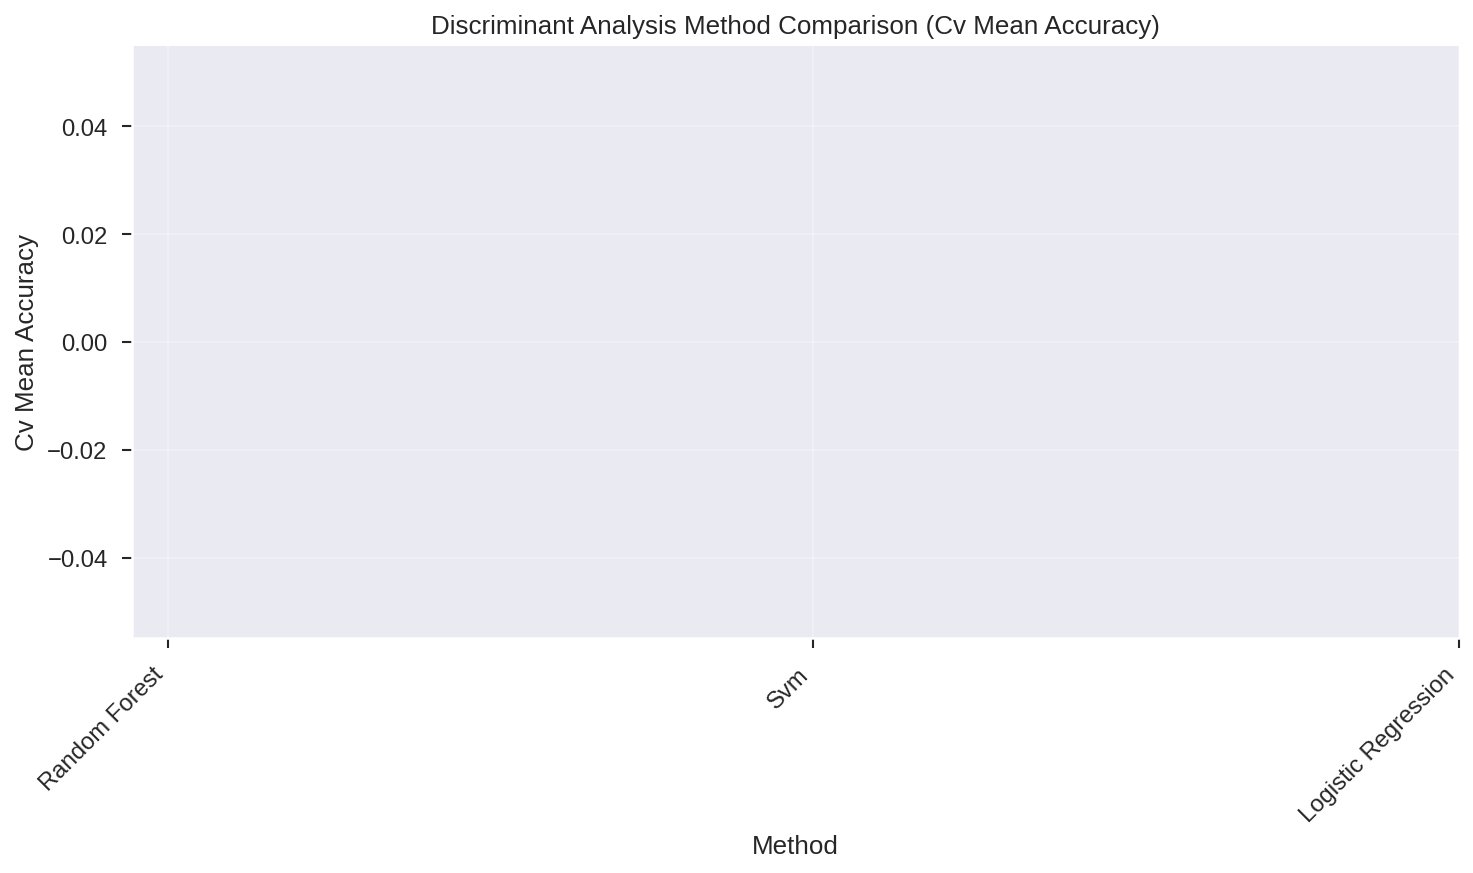

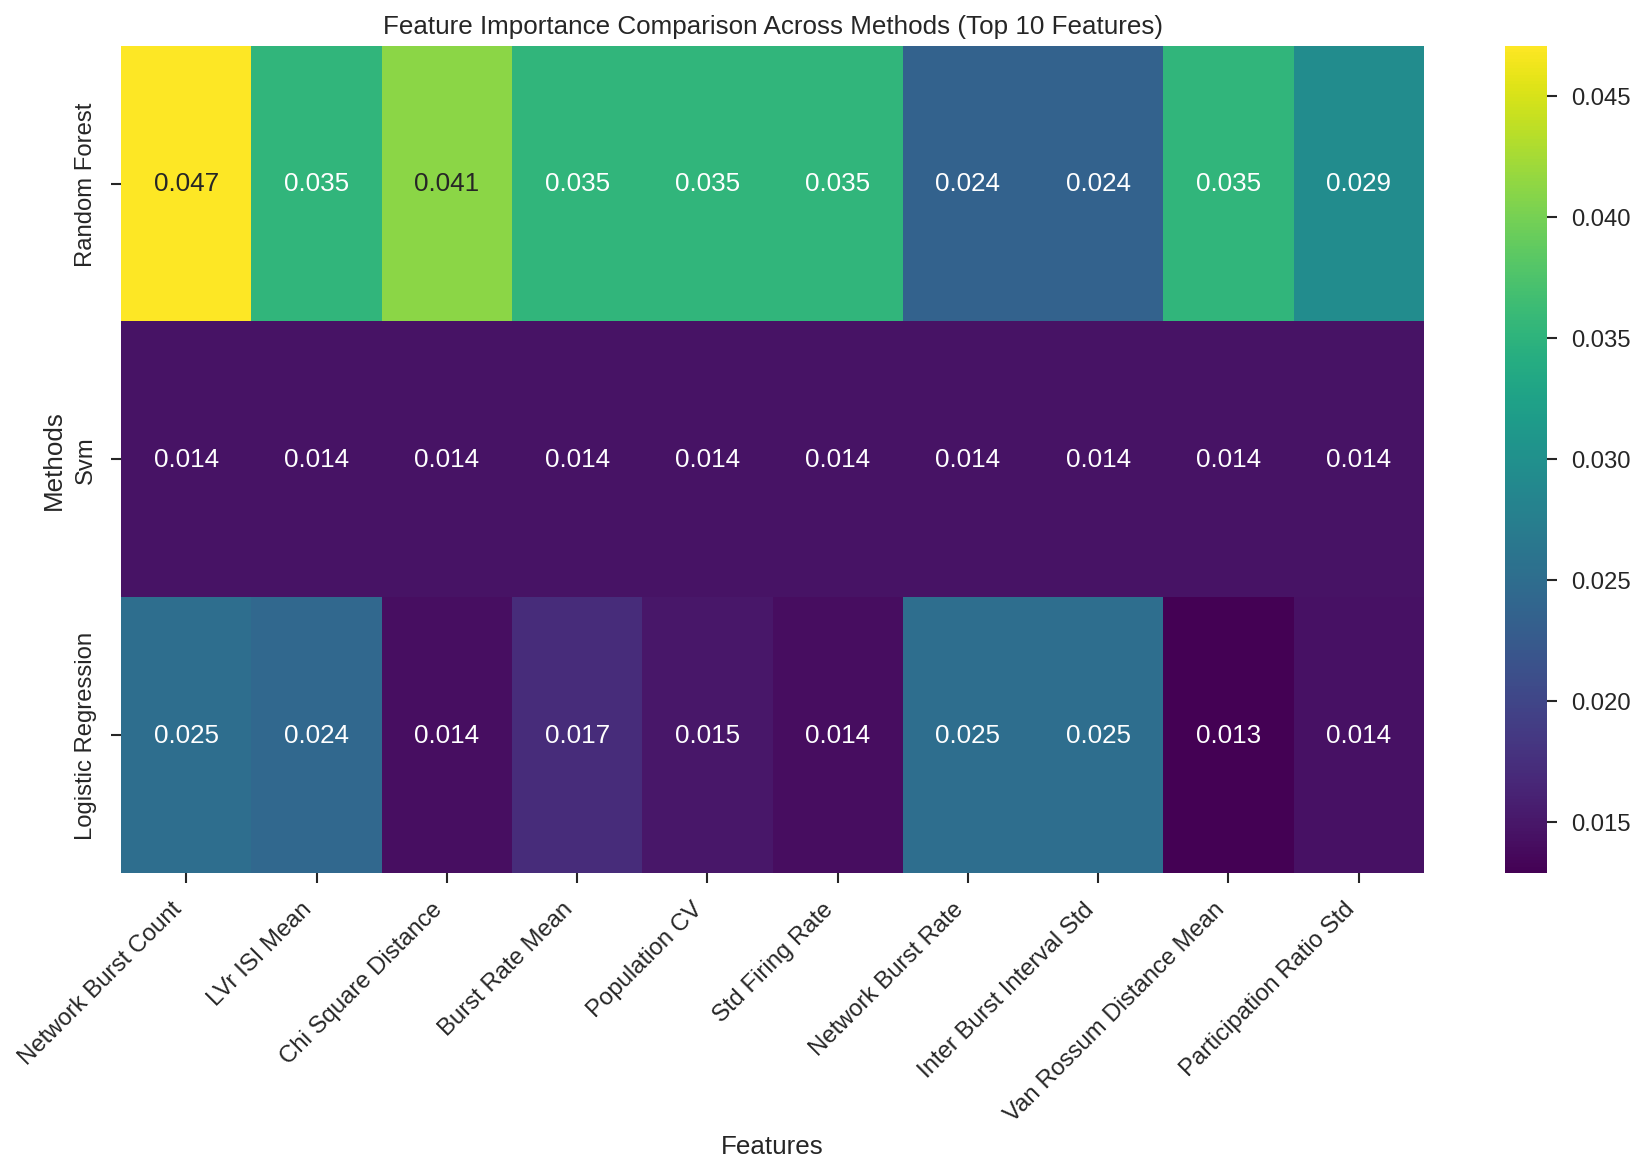

In [16]:
# Visualize method comparison
fig1 = plot_method_comparison(method_results, metric='cv_mean_accuracy')
fig1.show()

# Compare feature importance across methods
fig2 = plot_feature_importance_comparison(method_results, top_n=10)
fig2.show()

# Get best performing method
best_method = max(method_results.items(), 
                 key=lambda x: x[1].model_performance['cv_mean_accuracy'])
print(f"\nBest method: {best_method[0]} with {best_method[1].model_performance['cv_mean_accuracy']:.3f} accuracy")